<a href="https://colab.research.google.com/github/amirkasaei/Breast-Tumor-Classification-using-GNN/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font size=6><div dir=ltr align=center>
<font size=5>
Graph Neural Networks
<br>


### **Introduction**

This notebook is designed to introduce you to the basics of Graph Neural Networks (GNNs) using a dataset of pathology images. The steps you will follow are:

- Download the Dataset: Access and download a set of pathology images.
- Data Preprocessing: Prepare the data for processing.
- Nuclei Extraction: Identify the location and dimensions of nuclei in the images.
- GNN Model Implementation: Develop a GNN for classification.
- Experiments: Conduct experiments to test the effectiveness of your model.

You are encouraged to use relevant libraries, but please provide brief explanations for your choices and describe how they work.

## Requirements

In [ ]:
!pip install -q histomicstk --find-links https://girder.github.io/large_image_wheels
!pip install -q ogb
!pip install -q gdown
!pip install -q torchvision
!pip install -q torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.2/643.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.0/98.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.1/138.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 100.7 MB/s 

In [ ]:
!pip install histocartography -q
!pip install dgl -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 16.7 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/amirkasaei/histocartography/main/histocartography/preprocessing/nuclei_extraction.py -O nuclei_extraction.py
!cat '/content/nuclei_extraction.py' > '/usr/local/lib/python3.10/dist-packages/histocartography/preprocessing/nuclei_extraction.py'

!wget https://raw.githubusercontent.com/amirkasaei/histocartography/main/histocartography/preprocessing/feature_extraction.py -O feature_extraction.py
!cat '/content/feature_extraction.py' > '/usr/local/lib/python3.10/dist-packages/histocartography/preprocessing/feature_extraction.py'

--2023-12-27 09:45:01--  https://raw.githubusercontent.com/amirkasaei/histocartography/main/histocartography/preprocessing/nuclei_extraction.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11039 (11K) [text/plain]
Saving to: ‘nuclei_extraction.py’

nuclei_extraction.p 100%[===================>]  10.78K  --.-KB/s    in 0.001s  

2023-12-27 09:45:01 (14.4 MB/s) - ‘nuclei_extraction.py’ saved [11039/11039]

--2023-12-27 09:45:01--  https://raw.githubusercontent.com/amirkasaei/histocartography/main/histocartography/preprocessing/feature_extraction.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443..

## Imports

In [ ]:
import histomicstk as htk  # HistomicsTK for pathology image analysis
import numpy as np
import scipy as sp
import skimage.io
import skimage.measure
import skimage.color
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import torch.nn as nn
import sklearn

import copy
import os
import cv2

from torchvision.models import resnet18, ResNet18_Weights
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split


from torch.utils.data import Dataset, DataLoader
from torch_geometric.data import Dataset as geometric_Dataset
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader as geometric_Dataloader
from torch_geometric.utils.convert import from_dgl

In [ ]:
from glob import glob
from PIL import Image
import numpy as np
import torch
from tqdm import tqdm
from dgl.data.utils import save_graphs, load_graphs
import dgl

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
from histocartography.preprocessing import NucleiExtractor, DeepFeatureExtractor, KNNGraphBuilder, NucleiConceptExtractor, VahadaneStainNormalizer

## Dataset

We will use the BRACS test dataset, a collection of Hematoxylin and Eosin (H&E) stained histopathological images for breast tumor classification. The dataset includes over 4,000 tumor regions-of-interest labeled in 7 categories. You can download it using the following commands.

In [ ]:
# !gdown "https://drive.google.com/uc?export=download&id=1Hk7rtmyR65y4ZXUt9fNN_qlv-A8JyJVd" -O data.zip
# !unzip data.zip
# !rm -rf data.zip
# path='/content/data'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/AI/pathology_mini_dataset/'

Mounted at /content/drive


In [ ]:
classes = ['N', 'PB', 'UDH', 'ADH', 'FEA', 'DCIS','IC']
classIndex = {
    'N': 0,
    'PB': 1,
    'UDH': 2,
    'ADH': 3,
    'FEA': 4,
    'DCIS': 5,
    'IC': 6
}
features = ['image_path','class', 'label']
data_path = path+'data'

In [ ]:
data = []
for _class in os.listdir(data_path):
  class_idx = int(_class[0])
  for img in os.listdir(data_path+'/'+_class+'/'):
    image_path = data_path+'/'+_class+'/'+img
    data.append([image_path, classes[class_idx], class_idx])

In [ ]:
dataframe = pd.DataFrame(data,columns=features)
print(dataframe.shape)

(626, 3)


In [ ]:
dataframe.head()

,image_path,class,label
0,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2
1,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2
2,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2
3,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2
4,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2


## Preprocessing and Graphic Model Extraction


⛔
**There is a problem in the NucleiExtractor file which should be fixed before builing the modules**⛔

The used models are not accessible with the given links
so the model had to be downloaded and teh path passed directly to NucleiExtractor


original linkes:
- [monusac](https://drive.google.com/file/d/18MSg5Vtqu4DD8jfECwyF99AEyD77qayR/view?fbclid=IwAR28FglyoVUrHhkPVQg9rHFg9vw_enCrkMdYnKaRfaRKLkNjCvzEgZtBPSA)
- [pannuke](https://drive.google.com/file/d/1-Y1_RN3-_6AsSzd_BU5G6NBFdd-nwVEW/view?fbclid=IwAR1zrHgrBFIlJPmfHhdMZBX2W_mLwpqtN9sck0CLzPFdpX6uLlSepbDLXHo)

In [ ]:
# pannuke.pt
!gdown "https://drive.google.com/uc?export=download&id=1Ldp0IJtUoVP7mIj36JMla6Rrpa5L8qaQ"
# monusac
!gdown "https://drive.google.com/uc?export=download&id=1eKTKoIOdBSFURKnPasd-grEV-xxcUaD1"

Downloading...
From: https://drive.google.com/uc?export=download&id=1Ldp0IJtUoVP7mIj36JMla6Rrpa5L8qaQ
To: /content/hovernet_pannuke.pt
100% 135M/135M [00:03<00:00, 37.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1eKTKoIOdBSFURKnPasd-grEV-xxcUaD1
To: /content/hovernet_monusac.pt
100% 135M/135M [00:05<00:00, 26.7MB/s]


In [ ]:
pannuke_path = '/content/hovernet_pannuke.pt'
monusac_path = '/content/hovernet_monusac.pt'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Define nuclei extractor: HoverNet pre-trained on the PanNuke dataset.
nuclei_detector = NucleiExtractor(model_path=pannuke_path)

# Define a deep feature extractor with ResNet34 and patches 72 resized to 224 to match ResNet input
feature_extractor = DeepFeatureExtractor(architecture='resnet18', patch_size=72, resize_size=224)

# Define a graph builder to build a DGLGraph object
# with k=5 and thresholding edges longer
# than 50 pixels. Add image size-normalized centroids to the node features.
# For e.g., resulting node features are 512 features from ResNet34 + 2
graph_builder = KNNGraphBuilder(k=5, thresh=50, add_loc_feats=True)

# Define nuclei concept extractor: extract nuclei-level attributes - will be useful later for understanding the model
# nuclei_concept_extractor = NucleiConceptExtractor(
#   concept_names='area,eccentricity,roundness,roughness,shape_factor,mean_crowdedness,glcm_entropy,glcm_contrast'
# )

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


In [ ]:
def cell_graph_construction(image):

    # 2. nuclei detection
    nuclei_map, nuclei_centroids = nuclei_detector.process(image)

    # 3. nuclei feature extraction
    features = feature_extractor.process(image, nuclei_map)

    # 4. build the cell graph
    cell_graph = graph_builder.process(
        instance_map=nuclei_map,
        features=features
    )

    # 5. extract the nuclei-level concept, i.e., properties: shape, size, etc.
    # concepts = nuclei_concept_extractor.process(image, nuclei_map)

    # 6. print graph properties
    print('Number of nodes:', cell_graph.number_of_nodes())
    print('Number of edges:', cell_graph.number_of_edges())
    print('Number of features per node:', cell_graph.ndata['feat'].shape[1])

    return nuclei_map, cell_graph

In [ ]:
# Create output directories
os.makedirs('cell_graphs', exist_ok=True)
# os.makedirs('nuclei_concepts', exist_ok=True)

image_fnames = dataframe['image_path']
# target_image = image_fnames.pop(0)  # use the 1st image as target
# normalizer = VahadaneStainNormalizer(target_path=target_image)

for image_name in tqdm(image_fnames):
    print('Processing...', image_name)

    # 1. load image
    image = np.array(Image.open(image_name))

    #  apply Vahadane stain normalization
    # norm_image = normalizer.process(image)

    _, cell_graph = cell_graph_construction(image)

    # 7. save graph with DGL library and concepts
    image_id = os.path.basename(image_name).split('.')[0]
    graph_path = os.path.join('cell_graphs', image_id + '.bin')
    save_graphs(graph_path, [cell_graph])
    # with open(os.path.join('nuclei_concepts', image_id + '.npy'), 'wb') as f:
    #     np.save(f, concepts)


In [ ]:
# image = np.array(Image.open(dataframe['image_path'].iloc[0]))
# nuclei_map, cell_graph = cell_graph_construction(image)

## Visualization


In [ ]:
from histocartography.visualization import OverlayGraphVisualization, InstanceImageVisualization

In [ ]:
def visualize_cell_graph(image_path):

  # Visualize the nuclei detection
  visualizer = InstanceImageVisualization()

  image = np.array(Image.open(image_path))
  nuclei_map, cell_graph = cell_graph_construction(image)


  viz_nuclei = visualizer.process(image, instance_map=nuclei_map)

  # Visualize the resulting cell graph
  visualizer = OverlayGraphVisualization(
      instance_visualizer=InstanceImageVisualization(
          instance_style="filled+outline"
      )
  )
  viz_cg = visualizer.process(
    canvas=image,
    graph=cell_graph,
    instance_map=nuclei_map
  )

  fig, axs = plt.subplots(1,3, figsize=(19,6))

  axs[0].title.set_text("Original")
  axs[0].imshow(image)

  axs[1].title.set_text("Segmented")
  axs[1].imshow(viz_nuclei)

  axs[2].title.set_text("Cell Graph")
  axs[2].imshow(viz_cg)

Patch-level nuclei detection: 100%|██████████| 8/8 [00:11<00:00,  1.50s/it]


Number of nodes: 875
Number of edges: 2755
Number of features per node: 514


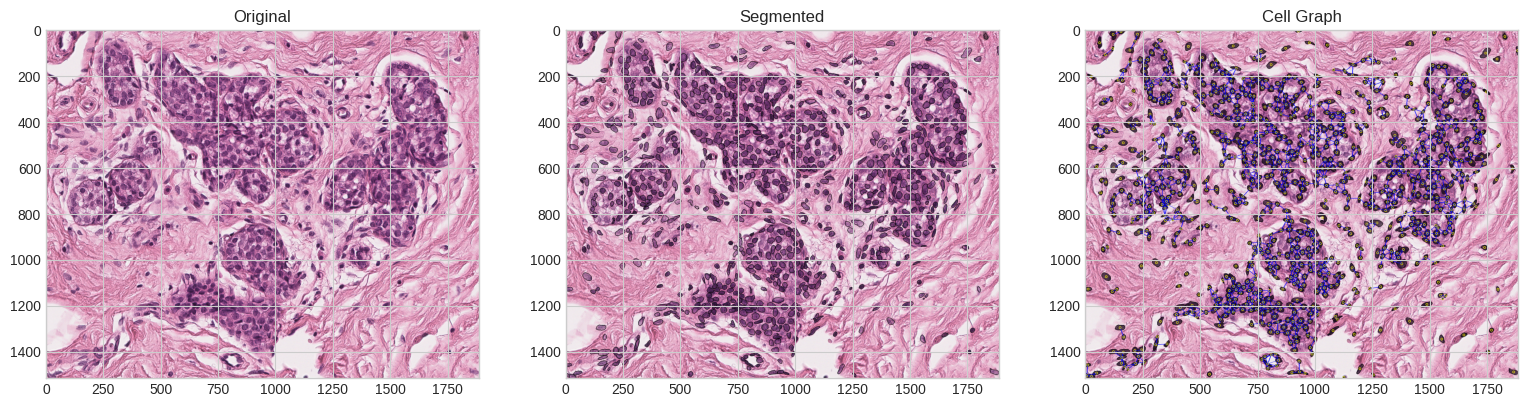

In [ ]:
visualize_cell_graph(dataframe['image_path'].iloc[4])

## Dataset Object

In [ ]:
graph_path = path + 'cell_graphs/'
features = ['graph_path','class', 'label']
graph_path

'/content/drive/MyDrive/AI/pathology_mini_dataset/cell_graphs/'

In [ ]:
graph_data = []
for graph in os.listdir(graph_path):
  g_path = graph_path+graph
  class_name = graph[:-4].split('_')[-2]
  class_label = classIndex[class_name]
  graph_data.append([g_path, class_name, class_label])

In [ ]:
graph_dataframe = pd.DataFrame(graph_data,columns=features)
graph_dataframe.head()

,graph_path,class,label
0,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2
1,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2
2,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2
3,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2
4,/content/drive/MyDrive/AI/pathology_mini_datas...,UDH,2


In [ ]:
class PathologyDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.samples = np.array(df[['graph_path', 'label']])
        # self.idx_split = self.get_idx_split()
        self.num_tasks = 7

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):

        g_path, label = self.samples[idx]

        graph = load_graphs(g_path)[0][0]

        geometric_data = from_dgl(graph)
        geometric_data.x = geometric_data.feat
        geometric_data.y = label

        return geometric_data

    def get_idx_split(self):

        indices = [i for i in range(self.__len__())]

        train_indices, val_test_indices = train_test_split(indices, test_size=0.2, random_state=0)
        val_indices , test_indices = train_test_split(val_test_indices, test_size=0.5, random_state=0)

        return {'train': train_indices, 'val': val_indices, 'test': test_indices}

## GCN Model Implementation

![test](https://drive.google.com/uc?id=128AuYAXNXGg7PIhJJ7e420DoPWKb-RtL)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # Implement a function that initializes self.convs,
        # self.bns, and self.softmax.

        super(GCN, self).__init__()
        self.num_layers = num_layers

        # A list of GCNConv layers
        conv_list = [GCNConv(input_dim, hidden_dim)]
        for i in range(num_layers - 1):
            conv_list.append(GCNConv(hidden_dim, hidden_dim))
        conv_list.append(GCNConv(hidden_dim, output_dim))
        self.convs = torch.nn.ModuleList(conv_list)

        # A list of 1D batch normalization layers
        self.bns = torch.nn.ModuleList([
            torch.nn.BatchNorm1d(hidden_dim)
            for _ in range(num_layers)
        ])

        # The log softmax layer
        self.softmax = torch.nn.Softmax(dim=-1)

        # Probability of an element getting zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # Implement a function that takes the feature tensor x and
        # edge_index tensor adj_t and returns the output tensor as
        # shown in the figure.

        x_prime = x
        for i in range(self.num_layers):
            x_prime = F.dropout(
                    F.relu(
                        self.bns[i](
                            self.convs[i](x_prime, adj_t)
                        )
                    ),
                    self.dropout, training=self.training
            )
        out = self.convs[-1](x_prime, adj_t)

        if not self.return_embeds:
            out = self.softmax(out)

        return out

## Graph Prediction Model

### Graph Mini-Batching
Before diving into the actual model, we introduce the concept of mini-batching with graphs. In order to parallelize the processing of a mini-batch of graphs, PyG combines the graphs into a single disconnected graph data object (*torch_geometric.data.Batch*). *torch_geometric.data.Batch* inherits from *torch_geometric.data.Data* (introduced earlier) and contains an additional attribute called `batch`.

The `batch` attribute is a vector mapping each node to the index of its corresponding graph within the mini-batch:

    batch = [0, ..., 0, 1, ..., n - 2, n - 1, ..., n - 1]

This attribute is crucial for associating which graph each node belongs to and can be used to e.g. average the node embeddings for each graph individually to compute graph level embeddings.


### Implemention
Now, we have all of the tools to implement a GCN Graph Prediction model!  

We will reuse the existing GCN model to generate `node_embeddings` and then use  `Global Pooling` over the nodes to create graph level embeddings that can be used to predict properties for the each graph. Remeber that the `batch` attribute will be essential for performining Global Pooling over our mini-batch of graphs.


In [ ]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool, global_max_pool

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout, pool):
        super(GCN_Graph, self).__init__()

        # Load encoders for Atoms in molecule graphs
        self.node_encoder = AtomEncoder(hidden_dim)

        # Node embedding model
        # Note that the input_dim and output_dim are set to hidden_dim
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)

        self.pool = pool

        # Output layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)


    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):

        # Extract important attributes of our mini-batch
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        # embed = self.node_encoder(x)

        node_embeddings = self.gnn_node(x, edge_index)

        graph_embeddings = self.pool(node_embeddings, batch)

        out = self.linear(graph_embeddings)

        return out

In [ ]:
def train_one_epoch(model, loader, criterion, optimizer, scheduler, device):

  model.train()  # Set model to training mode

  running_loss = 0.0
  running_accuracy = 0.0

  # Iterate over data.
  for step, batch in enumerate(loader):
    batch = batch.to(device)

    if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
        pass
    else:
      ## ignore nan targets (unlabeled) when computing training loss.
      is_labeled = batch.y == batch.y

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward
      with torch.set_grad_enabled(True):
        y_hat_all = model(batch)
        y_hat = y_hat_all[is_labeled]
        y = batch.y[is_labeled]
        loss = criterion(y_hat, y)

        loss.backward()
        optimizer.step()

      # statistics
      running_loss += loss.item()
      running_accuracy += sklearn.metrics.accuracy_score(y.cpu(), torch.argmax(y_hat, dim=1).cpu())


  loss = running_loss / len(loader)
  accuracy = running_accuracy / len(loader)

  return loss, accuracy

In [ ]:
def validate_one_epoch(model, loader, criterion, optimizer, scheduler, device):

  model.eval()  # Set model to training mode

  running_loss = 0.0
  running_accuracy = 0.0

  # Iterate over data.
  for step, batch in enumerate(loader):
    batch = batch.to(device)

    if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
        pass
    else:
      ## ignore nan targets (unlabeled) when computing training loss.
      is_labeled = batch.y == batch.y

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward
      with torch.set_grad_enabled(False):
        y_hat_all = model(batch)
        y_hat = y_hat_all[is_labeled]
        y = batch.y[is_labeled]
        loss = criterion(y_hat, y)


      # statistics
      running_loss += loss.item()
      running_accuracy += sklearn.metrics.accuracy_score(y.cpu(), torch.argmax(y_hat, dim=1).cpu())


  loss = running_loss / len(loader)
  accuracy = running_accuracy / len(loader)

  return loss, accuracy

In [ ]:
def train(model, loaders, criterion, optimizer, num_epochs, device, scheduler=None):

  best_valid_loss = float('inf')
  best_valid_acc = 0

  accuracy_dic, loss_dic = {}, {}
  loss_dic['train'], loss_dic['valid'] = [], []
  accuracy_dic['train'], accuracy_dic['valid'] = [], []

  for epoch in range(num_epochs):
      train_loss, train_acc = train_one_epoch(model, loaders['train'], criterion, optimizer, scheduler, device)
      val_loss, val_acc= validate_one_epoch(model, loaders['valid'], criterion, optimizer, scheduler, device)

      loss_dic['train'].append(train_loss)
      loss_dic['valid'].append(val_loss)
      accuracy_dic['train'].append(train_acc)
      accuracy_dic['valid'].append(val_acc)


      if val_loss < best_valid_loss:
        best_valid_acc = val_acc
        best_valid_loss = val_loss
        # best_model = model.state_dict()
        torch.save(model.state_dict(), model_path)



      print(f'Epoch [{epoch+1}/{num_epochs}] - '
            f'Train Loss: {train_loss:.4f} - '
            f'Train Accuracy: {train_acc:.4f} - '
            f'Valid Loss: {val_loss:.4f} - '
            f'Valid Accuracy {val_acc:.4f}% ')

  return loss_dic, accuracy_dic

In [ ]:
def show_plots(num_epochs, data, metric):
  e = np.arange(num_epochs)
  plt.plot(e, data['train'], label='train '+metric)
  plt.plot(e, data['valid'], label='validation '+metric)
  plt.xlabel('epoch')
  plt.ylabel(metric)
  plt.legend()

## Traing and Testing

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
args = {'device': device, 'num_layers': 5, 'hidden_dim': 514, 'dropout': 0.5, 'lr': 0.001, 'epochs': 30}

In [ ]:
dataset = PathologyDataset(graph_dataframe)
BATCH_SIZE = 32


# Ex. DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True, num_workers=0)

trainset, valset , testset = torch.utils.data.random_split(dataset, [0.8, 0.1, 0.1])

dataloaders = {}

dataloaders['train'] = geometric_Dataloader(trainset, batch_size=BATCH_SIZE, shuffle=True)
dataloaders['valid'] = geometric_Dataloader(valset, batch_size=BATCH_SIZE, shuffle=False)
dataloaders['test'] = geometric_Dataloader(testset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
model_path = '/content/model_mean.pt'

In [ ]:
model = GCN_Graph(args['hidden_dim'], dataset.num_tasks, args['num_layers'], args['dropout'], global_mean_pool).to(device)

num_epochs = args['epochs']

model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
loss_dic, accuracy_dic = train(model, dataloaders, loss_fn, optimizer, num_epochs, device)

Epoch [1/30] - Train Loss: 1.6096 - Train Accuracy: 0.3658 - Valid Loss: 1.6916 - Valid Accuracy 0.3805% 
Epoch [2/30] - Train Loss: 1.0527 - Train Accuracy: 0.6002 - Valid Loss: 1.1993 - Valid Accuracy 0.5383% 
Epoch [3/30] - Train Loss: 0.8535 - Train Accuracy: 0.7050 - Valid Loss: 1.6324 - Valid Accuracy 0.5237% 
Epoch [4/30] - Train Loss: 0.8296 - Train Accuracy: 0.6853 - Valid Loss: 1.7150 - Valid Accuracy 0.4909% 
Epoch [5/30] - Train Loss: 0.6562 - Train Accuracy: 0.7564 - Valid Loss: 1.0494 - Valid Accuracy 0.6356% 
Epoch [6/30] - Train Loss: 0.5916 - Train Accuracy: 0.7957 - Valid Loss: 1.2023 - Valid Accuracy 0.6033% 
Epoch [7/30] - Train Loss: 0.4570 - Train Accuracy: 0.8592 - Valid Loss: 1.4823 - Valid Accuracy 0.6361% 
Epoch [8/30] - Train Loss: 0.4238 - Train Accuracy: 0.8426 - Valid Loss: 2.4482 - Valid Accuracy 0.3498% 
Epoch [9/30] - Train Loss: 0.4355 - Train Accuracy: 0.8543 - Valid Loss: 1.3070 - Valid Accuracy 0.6512% 
Epoch [10/30] - Train Loss: 0.4144 - Train Acc

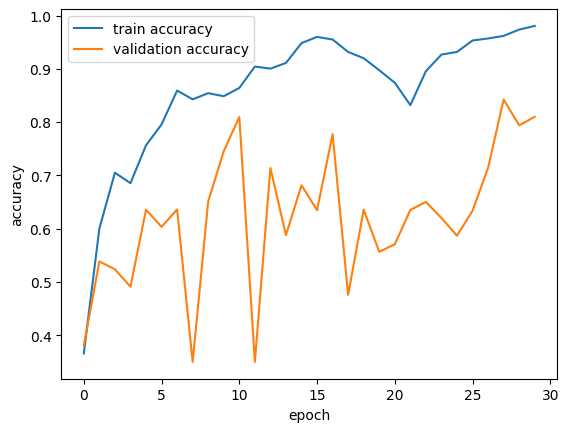

In [ ]:
show_plots(num_epochs, accuracy_dic, 'accuracy')

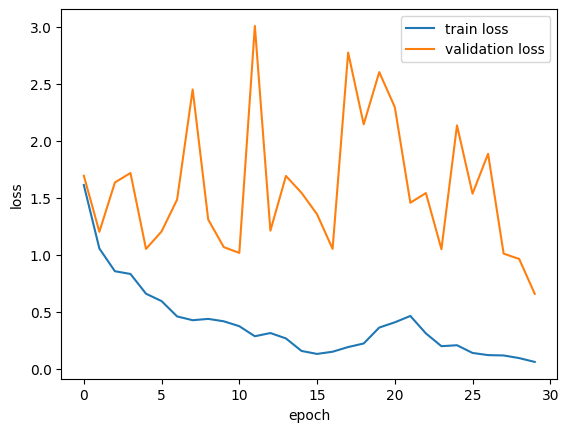

In [ ]:
show_plots(num_epochs, loss_dic, 'loss')

In [ ]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
test_loss, test_acc = validate_one_epoch(model, dataloaders['test'], loss_fn, optimizer, None, device)
print(test_loss, test_acc)

1.1637401580810547 0.740625


## Other Experiments

Experiment with different global pooling layers in PyTorch Geometric and observe the changes in model performance. [Two global pooling layers other than mean pooling in Pytorch Geometric.]

### global add pool

In [ ]:
model_path = '/content/model_add.pt'

In [ ]:
model = GCN_Graph(args['hidden_dim'], dataset.num_tasks, args['num_layers'], args['dropout'], global_add_pool).to(device)

num_epochs = args['epochs']

model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
loss_dic, accuracy_dic = train(model, dataloaders, loss_fn, optimizer, num_epochs, device)

Epoch [1/30] - Train Loss: 453.0669 - Train Accuracy: 0.2510 - Valid Loss: 2506.6205 - Valid Accuracy 0.0640% 
Epoch [2/30] - Train Loss: 147.9601 - Train Accuracy: 0.2826 - Valid Loss: 509.0838 - Valid Accuracy 0.2535% 
Epoch [3/30] - Train Loss: 132.3345 - Train Accuracy: 0.3528 - Valid Loss: 141.9607 - Valid Accuracy 0.4602% 
Epoch [4/30] - Train Loss: 101.7149 - Train Accuracy: 0.3244 - Valid Loss: 224.7454 - Valid Accuracy 0.3498% 
Epoch [5/30] - Train Loss: 62.5969 - Train Accuracy: 0.4438 - Valid Loss: 86.3566 - Valid Accuracy 0.3977% 
Epoch [6/30] - Train Loss: 54.5155 - Train Accuracy: 0.4837 - Valid Loss: 33.4494 - Valid Accuracy 0.6033% 
Epoch [7/30] - Train Loss: 68.9537 - Train Accuracy: 0.5153 - Valid Loss: 62.3551 - Valid Accuracy 0.5408% 
Epoch [8/30] - Train Loss: 69.6601 - Train Accuracy: 0.5053 - Valid Loss: 121.9497 - Valid Accuracy 0.3967% 
Epoch [9/30] - Train Loss: 41.1822 - Train Accuracy: 0.5082 - Valid Loss: 35.7698 - Valid Accuracy 0.5076% 
Epoch [10/30] - Tr

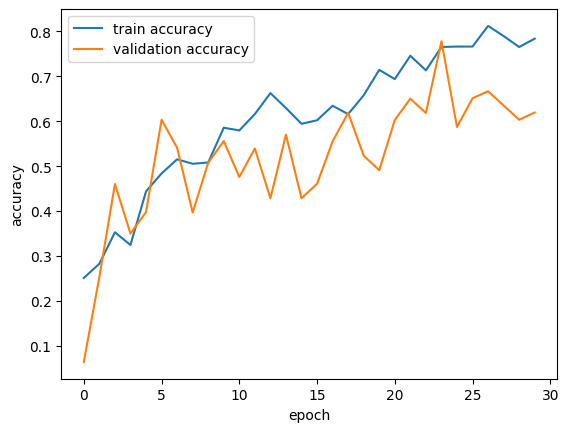

In [ ]:
show_plots(num_epochs, accuracy_dic, 'accuracy')

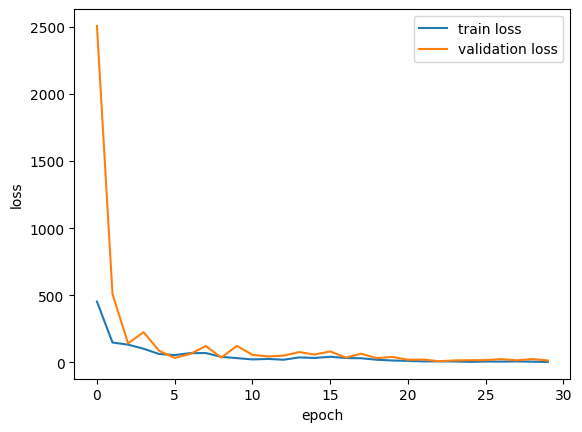

In [ ]:
show_plots(num_epochs, loss_dic, 'loss')

In [ ]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
test_loss, test_acc = validate_one_epoch(model, dataloaders['test'], loss_fn, optimizer, None, device)
print(test_loss, test_acc)

14.314958095550537 0.5770833333333334


### global max pool

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_path = '/content/model_max.pt'

In [ ]:
model = GCN_Graph(args['hidden_dim'], dataset.num_tasks, args['num_layers'], args['dropout'], global_max_pool).to(device)

num_epochs = args['epochs']

model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
loss_dic, accuracy_dic = train(model, dataloaders, loss_fn, optimizer, num_epochs, device)

Epoch [1/30] - Train Loss: 3.6426 - Train Accuracy: 0.1515 - Valid Loss: 1.8833 - Valid Accuracy 0.1739% 
Epoch [2/30] - Train Loss: 2.3488 - Train Accuracy: 0.1955 - Valid Loss: 1.8998 - Valid Accuracy 0.1431% 
Epoch [3/30] - Train Loss: 1.8766 - Train Accuracy: 0.2902 - Valid Loss: 2.0512 - Valid Accuracy 0.1436% 
Epoch [4/30] - Train Loss: 1.7719 - Train Accuracy: 0.3207 - Valid Loss: 2.2414 - Valid Accuracy 0.1275% 
Epoch [5/30] - Train Loss: 1.6803 - Train Accuracy: 0.3656 - Valid Loss: 2.3398 - Valid Accuracy 0.1275% 
Epoch [6/30] - Train Loss: 1.7441 - Train Accuracy: 0.3198 - Valid Loss: 2.3253 - Valid Accuracy 0.1275% 
Epoch [7/30] - Train Loss: 1.5692 - Train Accuracy: 0.3997 - Valid Loss: 2.2291 - Valid Accuracy 0.1275% 
Epoch [8/30] - Train Loss: 1.4502 - Train Accuracy: 0.4545 - Valid Loss: 2.5356 - Valid Accuracy 0.1275% 
Epoch [9/30] - Train Loss: 1.4325 - Train Accuracy: 0.4184 - Valid Loss: 2.5612 - Valid Accuracy 0.1275% 
Epoch [10/30] - Train Loss: 1.4111 - Train Acc

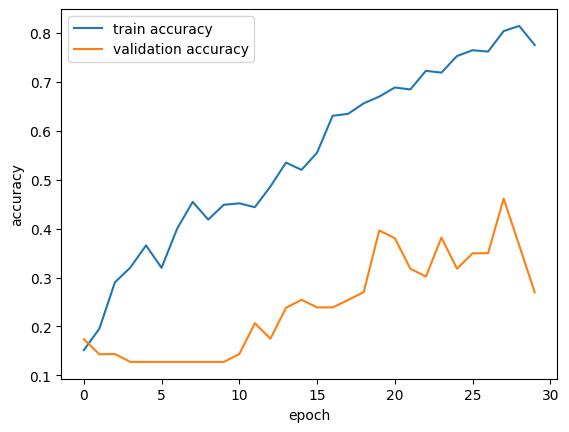

In [ ]:
show_plots(num_epochs, accuracy_dic, 'accuracy')

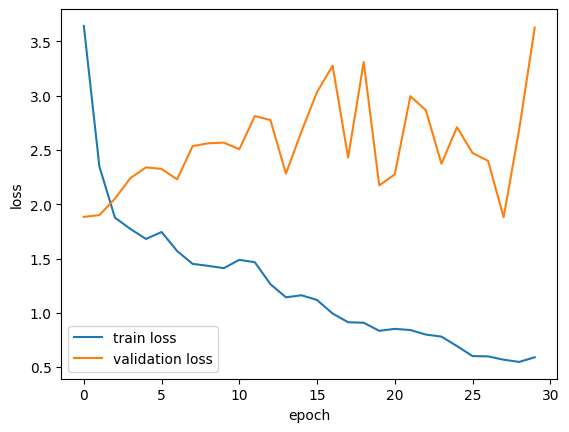

In [ ]:
show_plots(num_epochs, loss_dic, 'loss')

In [ ]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
test_loss, test_acc = validate_one_epoch(model, dataloaders['test'], loss_fn, optimizer, None, device)
print(test_loss, test_acc)

2.0065691471099854 0.45208333333333334


Important Reminder: The functions provided in this notebook serve as initial templates and examples. You are encouraged to modify and adapt them as needed to suit your specific requirements or to improve performance. However, while making these changes, please endeavor to preserve the overall structure and objectives of the exercise.


## References:

- [Histocartography](https://github.com/BiomedSciAI/histocartography)